In [10]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999
# Read the CSV file
df = pd.read_csv('football_stats.csv')

# Display the DataFrame
print(df)

    Unnamed: 0  Unnamed: 1  position                   team  matches  wins  \
0      La_liga        2015         1              Barcelona       38    29   
1      La_liga        2015         2            Real Madrid       38    28   
2      La_liga        2015         3        Atletico Madrid       38    28   
3      La_liga        2015         4             Villarreal       38    18   
4      La_liga        2015         5          Athletic Club       38    18   
..         ...         ...       ...                    ...      ...   ...   
907       RFPL        2022        12  Krylya Sovetov Samara       30     8   
908       RFPL        2022        13        Nizhny Novgorod       30     8   
909       RFPL        2022        14                  Fakel       30     6   
910       RFPL        2022        15                 Khimki       30     4   
911       RFPL        2022        16         Torpedo Moscow       30     2   

     draws  loses  scored  missed  pts     xG  xG_diff  npxG   

In [12]:
df = df.rename(index=int,columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 911
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        912 non-null    object 
 1   year          912 non-null    int64  
 2   position      912 non-null    int64  
 3   team          912 non-null    object 
 4   matches       912 non-null    int64  
 5   wins          912 non-null    int64  
 6   draws         912 non-null    int64  
 7   loses         912 non-null    int64  
 8   scored        912 non-null    int64  
 9   missed        912 non-null    int64  
 10  pts           912 non-null    int64  
 11  xG            912 non-null    float64
 12  xG_diff       912 non-null    float64
 13  npxG          912 non-null    float64
 14  xGA           912 non-null    float64
 15  xGA_diff      912 non-null    float64
 16  npxGA         912 non-null    float64
 17  npxGD         912 non-null    float64
 18  ppda_coef     912 non-null    

In [13]:
df.describe()

,year,position,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00,912.00
mean,"2,018.50",10.06,36.02,13.50,9.02,13.50,49.23,49.23,49.53,48.55,-0.68,44.09,48.55,-0.68,44.09,0.00,11.62,11.62,218.62,218.62,49.77,0.24
std,2.29,5.58,3.14,5.92,2.91,5.45,17.21,13.81,17.01,14.76,6.87,13.92,12.09,6.62,11.32,19.94,2.61,3.40,85.35,56.26,13.88,7.11
min,"2,015.00",1.00,27.00,2.00,2.00,1.00,13.00,15.00,11.00,15.06,-30.96,13.17,18.16,-29.18,15.90,-44.80,6.01,4.39,77.00,86.00,14.64,-24.72
25%,"2,016.75",5.00,34.00,9.00,7.00,10.00,37.00,39.75,38.00,38.90,-4.87,34.96,40.10,-5.13,36.17,-13.44,9.68,9.35,159.00,177.00,39.61,-4.34
50%,"2,018.50",10.00,38.00,12.00,9.00,14.00,46.00,49.00,46.00,45.82,-0.22,41.43,48.67,-0.65,44.00,-2.43,11.32,10.90,197.00,214.50,47.21,0.20
75%,"2,020.25",15.00,38.00,17.00,11.00,17.00,58.00,58.00,60.00,56.11,4.09,50.98,56.62,3.82,51.63,11.03,13.31,13.10,256.00,259.00,58.24,5.00
max,"2,022.00",20.00,38.00,32.00,18.00,29.00,116.00,94.00,100.00,113.60,18.15,99.48,91.97,18.49,82.08,67.99,21.90,30.47,582.00,393.00,94.38,23.05


## Find out the best leagues

##### First, let's find out the league which has the highst xG_value, xG_diff value using with football metrics

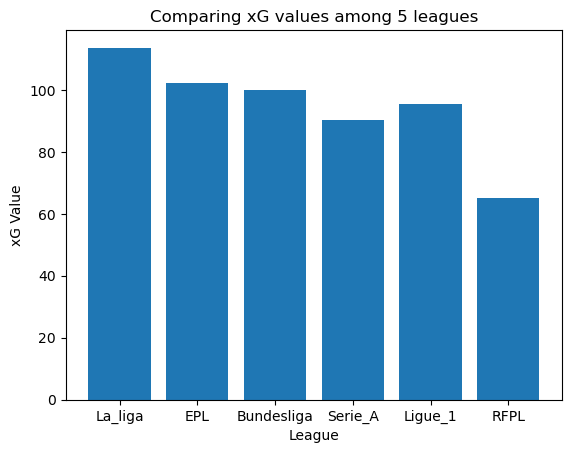

In [14]:
fig, ax = plt.subplots()

ax.bar(data=df, x='league',height='xG')

ax.set(title='Comparing xG values among 5 leagues',
      xlabel='League',
      ylabel='xG Value')

plt.show()

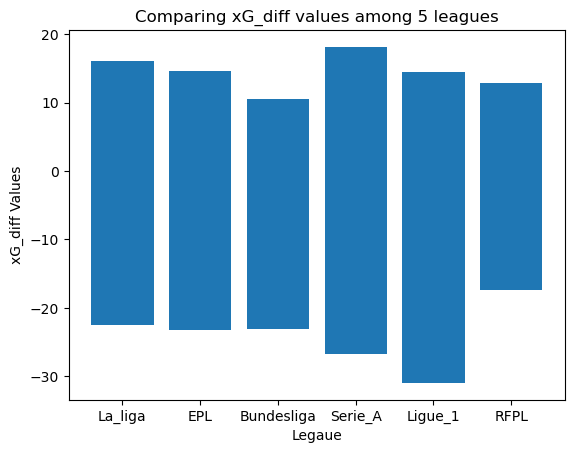

In [15]:
fig, ax= plt.subplots()

ax.bar(data=df, x='league', height='xG_diff')

ax.set(title="Comparing xG_diff values among 5 leagues",
      xlabel="Legaue",
      ylabel="xG_diff Values")

plt.show()

<Axes: xlabel='league', ylabel='xG_diff'>

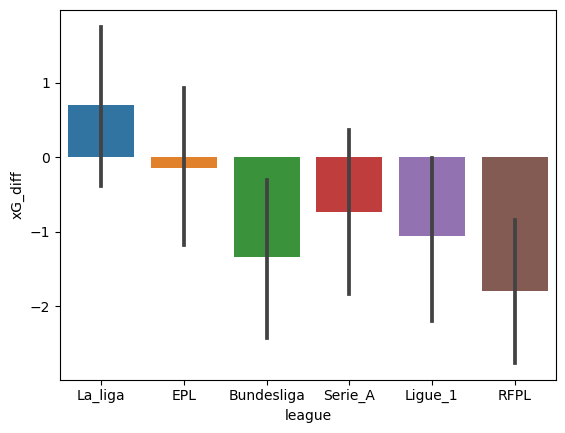

In [16]:
sns.barplot(data=df, x='league', y='xG_diff')

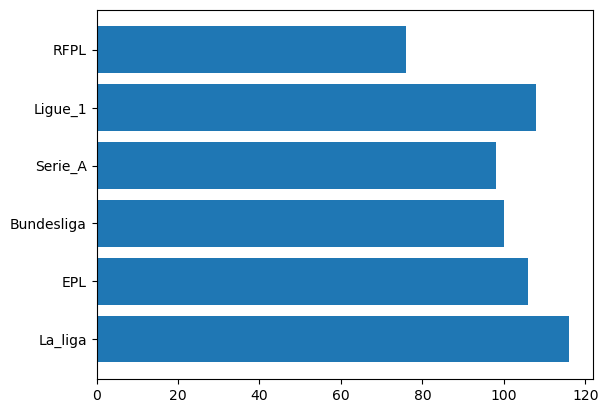

In [17]:
fig, ax = plt.subplots()

ax.barh(data=df, y='league', width=df['scored'])

plt.show()

## Exploring which teams are the best

### EPL

In [18]:
epl = df[df['league'] == "EPL"]
epl.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
160,EPL,2015,1,Leicester,38,23,12,3,68,36,81,68.42,0.42,58.52,45.02,9.02,41.98,16.55,10.10,8.60,217,275,68.94,-12.06
161,EPL,2015,2,Arsenal,38,20,11,7,65,36,71,73.53,8.53,72.01,33.86,-2.14,33.10,38.91,8.79,12.22,467,192,77.01,6.01
162,EPL,2015,3,Tottenham,38,19,13,6,69,35,70,63.42,-5.58,59.61,37.08,2.08,35.56,24.05,6.68,11.69,255,182,69.45,-0.55


In [19]:
epl.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Manchester City,216,688.85,730
Liverpool,188,599.14,636
Tottenham,165,495.63,564
Arsenal,163,517.15,549
Manchester United,159,489.13,490


In [20]:
epl.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Manchester City,27.00,86.11,91.25
Liverpool,23.50,74.89,79.50
Tottenham,20.62,61.95,70.50
Arsenal,20.38,64.64,68.62
Manchester United,19.88,61.14,61.25


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\1392254706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  epl_grouping = epl.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


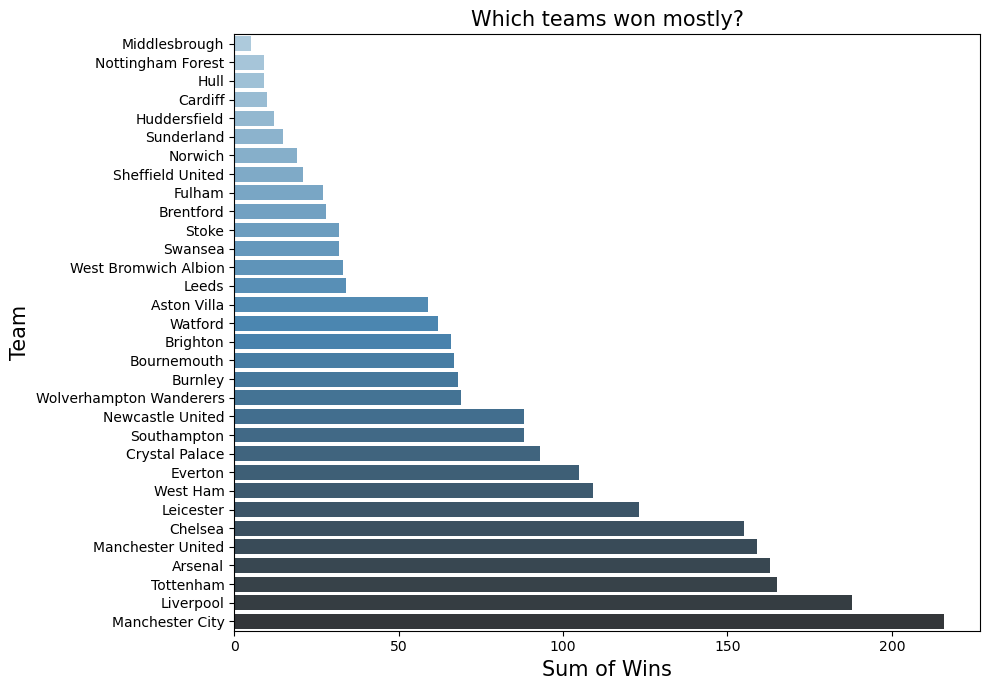

In [21]:
# Let's make some visual to check exatly the number of wins for each team.
epl_grouping = epl.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

epl_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=epl_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

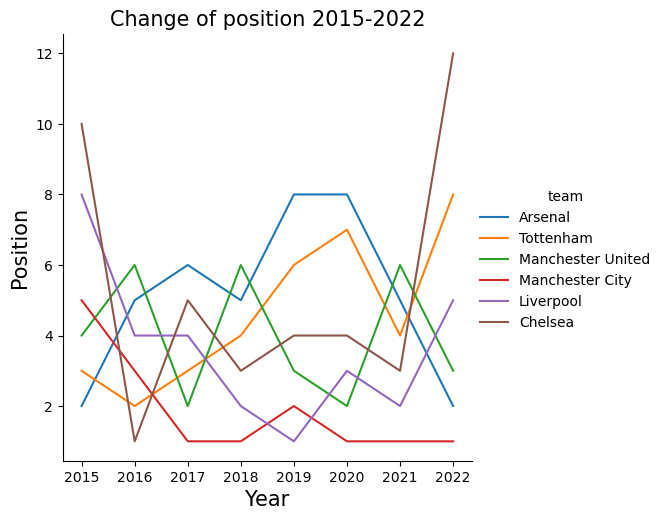

In [22]:
top_6 = ['Manchester City', 'Liverpool', 'Tottenham', 'Arsenal', 'Manchester United', 'Chelsea' ]
top_6_data = epl[epl['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()

### La liga

In [23]:
la_liga = df[df['league'] == "La_liga"]
la_liga.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2015,1,Barcelona,38,29,4,5,112,29,91,113.60,1.60,99.48,34.03,5.03,33.29,66.19,6.01,15.06,570,163,94.38,3.38
1,La_liga,2015,2,Real Madrid,38,28,6,4,110,34,90,90.45,-19.55,83.76,45.23,11.23,42.26,41.50,9.25,14.57,404,211,79.09,-10.91
2,La_liga,2015,3,Atletico Madrid,38,28,4,6,63,18,88,54.93,-8.07,53.44,27.80,9.80,27.05,26.39,8.83,9.05,261,170,72.28,-15.72


In [24]:
la_liga.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Barcelona,209,690.22,726
Real Madrid,201,638.10,665
Atletico Madrid,184,462.24,499
Sevilla,143,461.29,438
Villarreal,133,462.54,451


In [25]:
la_liga.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Barcelona,26.12,86.28,90.75
Real Madrid,25.12,79.76,83.12
Atletico Madrid,23.00,57.78,62.38
Sevilla,17.88,57.66,54.75
Villarreal,16.62,57.82,56.38


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\253732154.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  la_liga_grouping = la_liga.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


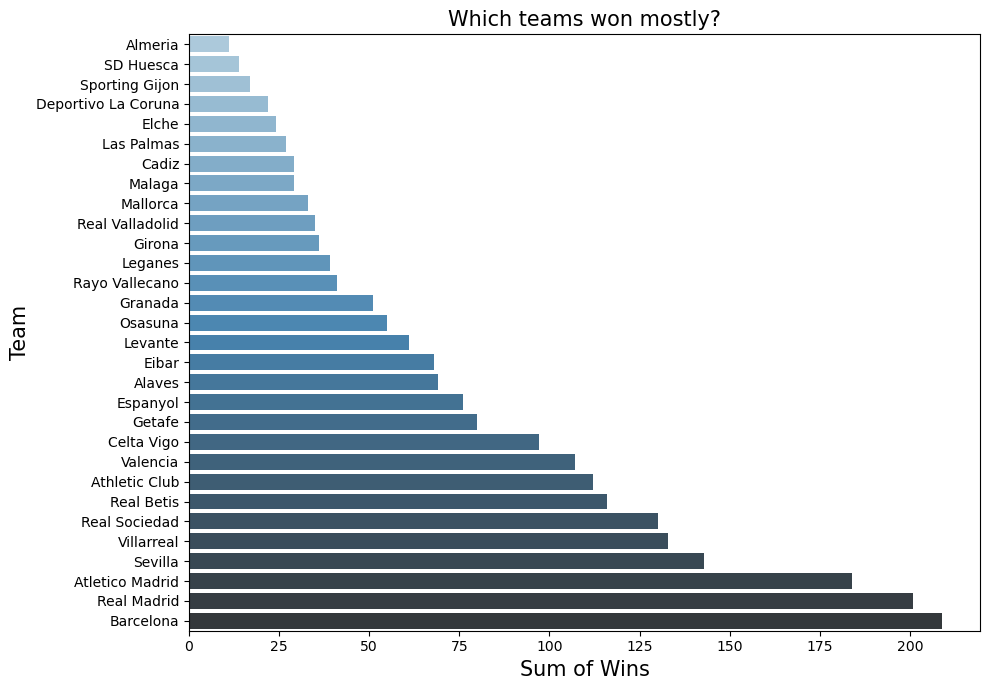

In [26]:
# Let's make some visual to check exatly the number of wins for each team.
la_liga_grouping = la_liga.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

la_liga_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=la_liga_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

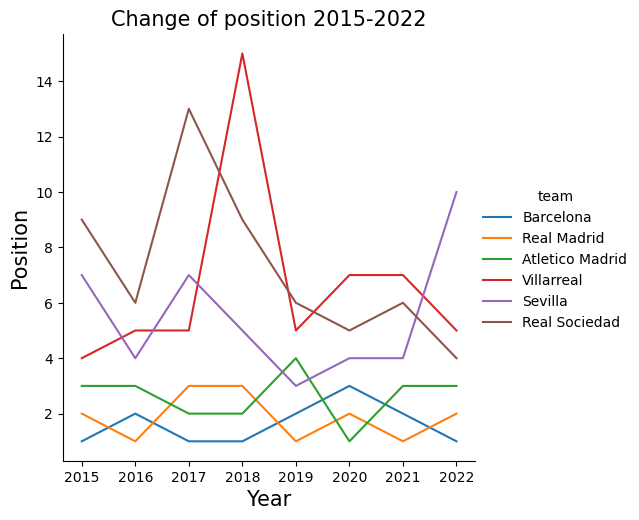

In [28]:
top_6 = ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Sevilla', 'Villarreal', 'Real Sociedad' ]
top_6_data = la_liga[la_liga['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()

### Bundesliga

In [31]:
bundesliga = df[df['league'] == "Bundesliga"]
bundesliga.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
320,Bundesliga,2015,1,Bayern Munich,34,28,4,2,80,17,88,77.04,-2.96,70.22,20.79,3.79,19.28,50.94,6.56,23.12,353,103,77.97,-10.03
321,Bundesliga,2015,2,Borussia Dortmund,34,24,6,4,82,34,78,83.41,1.41,78.84,29.18,-4.82,26.15,52.70,7.70,18.39,387,126,76.58,-1.42
322,Bundesliga,2015,3,Bayer Leverkusen,34,18,6,10,56,40,60,52.91,-3.09,50.63,41.24,1.24,35.93,14.70,6.17,8.52,243,165,56.66,-3.34


In [33]:
bundesliga.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Bayern Munich,199,673.55,737
Borussia Dortmund,165,565.24,626
Bayer Leverkusen,128,453.64,487
RasenBallsport Leipzig,128,454.27,463
Borussia M.Gladbach,114,446.11,450


In [34]:
bundesliga.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Bayern Munich,24.88,84.19,92.12
Borussia Dortmund,20.62,70.66,78.25
RasenBallsport Leipzig,18.29,64.90,66.14
Bayer Leverkusen,16.00,56.71,60.88
Union Berlin,14.50,44.46,48.00


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\3680761297.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bundesliga_grouping = bundesliga.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


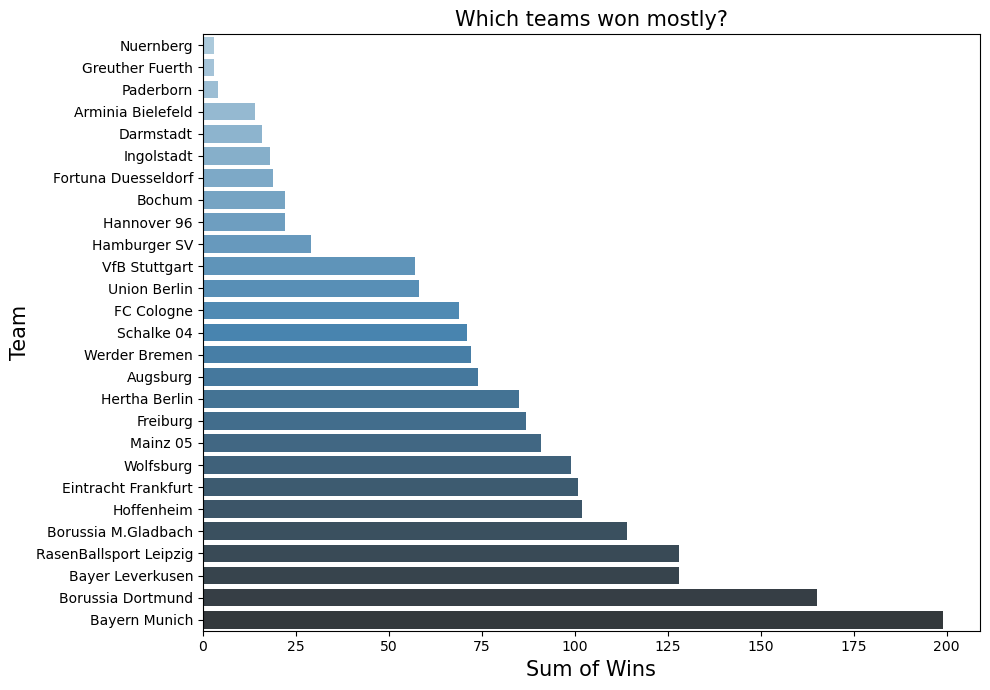

In [35]:
# Let's make some visual to check exatly the number of wins for each team.
bundesliga_grouping = bundesliga.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

bundesliga_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=bundesliga_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

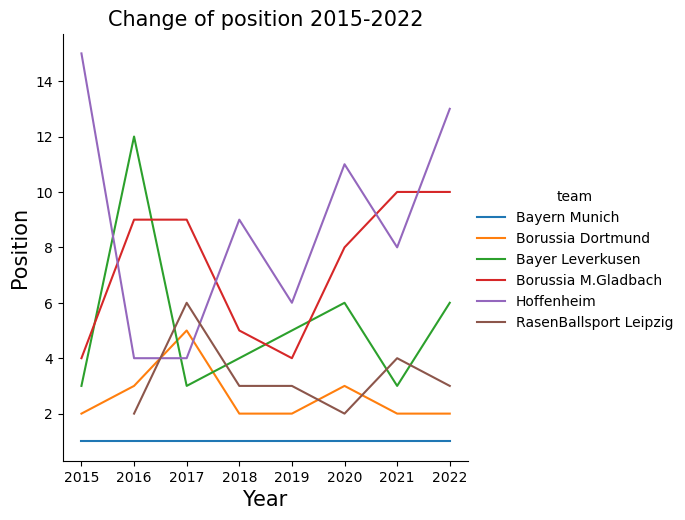

In [37]:
top_6 = ['Bayern Munich', 'Borussia Dortmund', 'Bayer Leverkusen', 'RasenBallsport Leipzig', 'Borussia M.Gladbach', 'Hoffenheim' ]
top_6_data = bundesliga[bundesliga['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()

### Serie_A

In [38]:
Serie_a = df[df['league'] == "Serie_A"]
Serie_a.head(3)


,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
464,Serie_A,2015,1,Juventus,38,29,4,5,75,20,91,62.99,-12.01,56.14,23.00,3.00,19.92,36.22,8.92,10.94,270,101,78.74,-12.26
465,Serie_A,2015,2,Napoli,38,25,7,6,80,32,82,69.53,-10.47,63.44,26.69,-5.31,22.76,40.68,8.07,16.60,320,142,79.07,-2.93
466,Serie_A,2015,3,Roma,38,23,11,4,83,41,80,64.43,-18.57,61.38,39.79,-1.21,33.55,27.83,8.23,13.49,326,142,69.85,-10.15


In [39]:
Serie_a.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Juventus,207,533.36,574
Napoli,197,559.96,623
Inter,179,565.02,570
Roma,167,562.68,554
AC Milan,159,494.17,487


In [40]:
Serie_a.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Juventus,25.88,66.67,71.75
Napoli,24.62,69.99,77.88
Inter,22.38,70.63,71.25
Roma,20.88,70.34,69.25
AC Milan,19.88,61.77,60.88


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\1705828192.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Serie_a_grouping = Serie_a.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


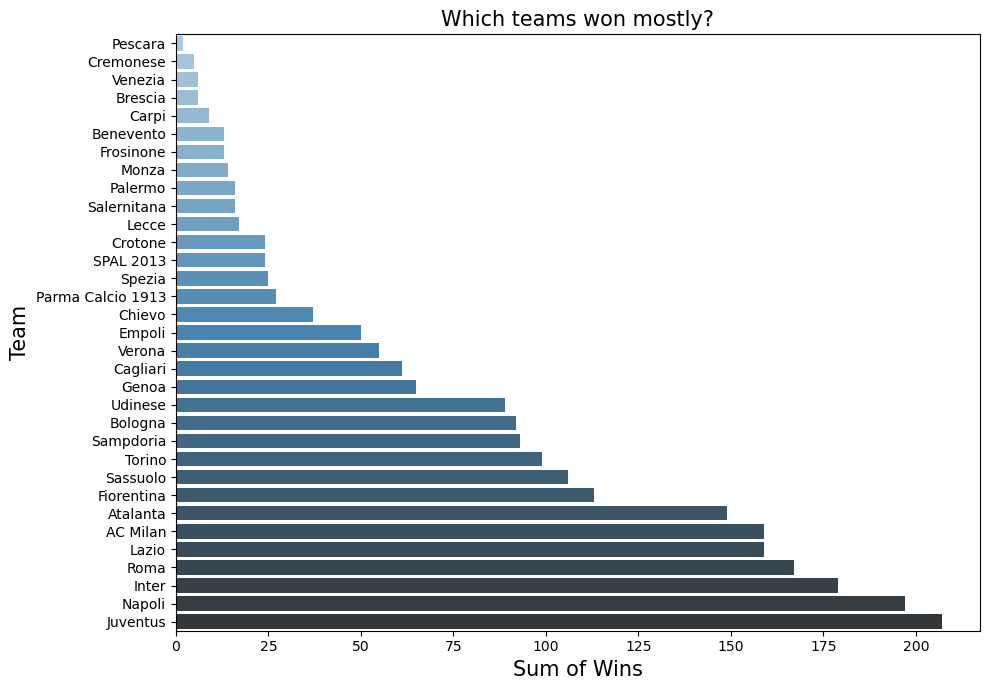

In [41]:
# Let's make some visual to check exatly the number of wins for each team.
Serie_a_grouping = Serie_a.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

Serie_a_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=Serie_a_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

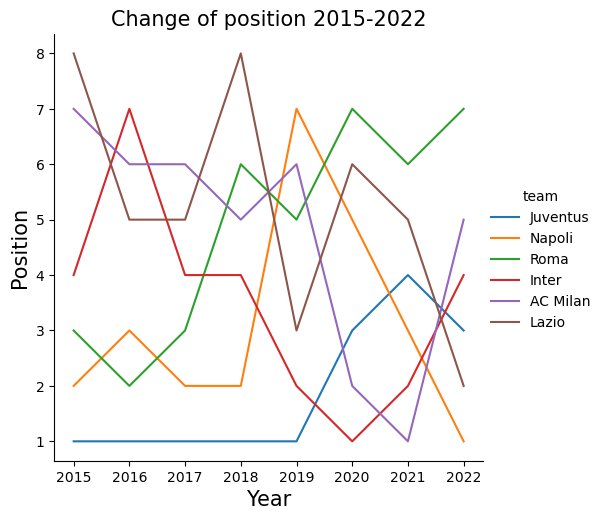

In [42]:
top_6 = ['Juventus', 'Napoli', 'Inter', 'Roma', 'Lazio', 'AC Milan' ]
top_6_data = Serie_a[Serie_a['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()

### Ligue_1

In [43]:
ligue_1 = df[df['league'] == "Ligue_1"]
ligue_1.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
624,Ligue_1,2015,1,Paris Saint Germain,38,30,6,2,102,19,96,86.20,-15.80,79.96,24.37,5.37,22.09,57.87,6.69,20.33,341,121,90.27,-5.73
625,Ligue_1,2015,2,Lyon,38,19,8,11,67,43,65,63.01,-3.99,59.97,38.01,-4.99,36.49,23.48,6.40,14.37,294,114,68.69,3.69
626,Ligue_1,2015,3,Monaco,38,17,14,7,57,50,65,58.13,1.13,52.81,48.81,-1.19,46.53,6.28,9.01,9.60,154,197,59.39,-5.61


In [44]:

ligue_1.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Paris Saint Germain,216,682.42,738
Monaco,153,490.92,542
Lyon,152,533.84,558
Marseille,142,455.52,470
Lille,132,401.41,400


In [45]:
ligue_1.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Paris Saint Germain,27.00,85.30,92.25
Monaco,19.12,61.36,67.75
Lyon,19.00,66.73,69.75
Lens,19.00,59.51,61.67
Marseille,17.75,56.94,58.75


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\1993838538.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ligue_1_grouping = ligue_1.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


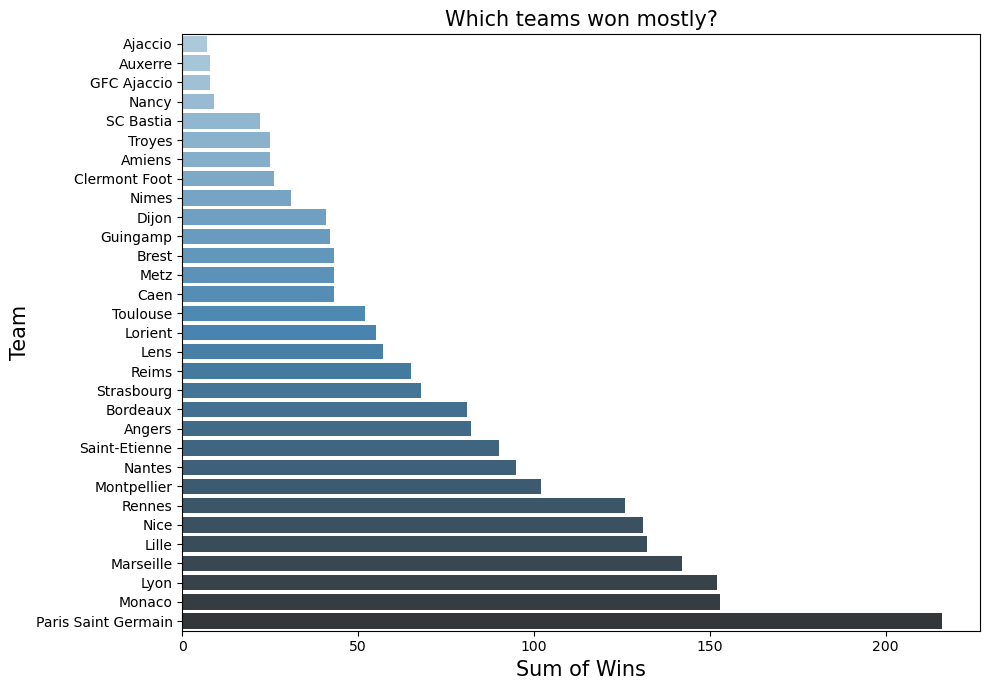

In [46]:
# Let's make some visual to check exatly the number of wins for each team.
ligue_1_grouping = ligue_1.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

ligue_1_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=ligue_1_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

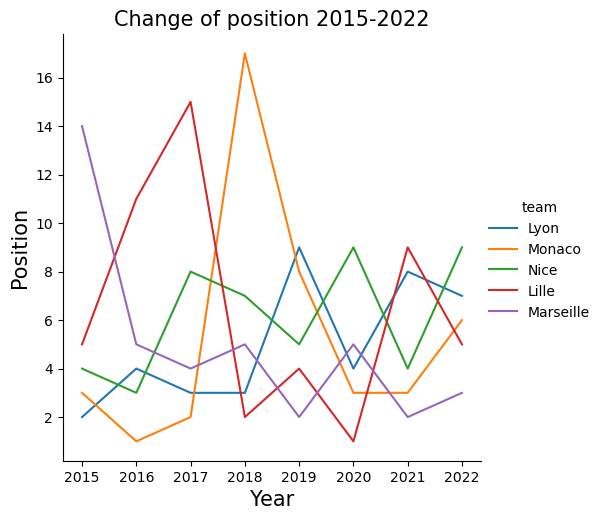

In [47]:
top_6 = ['Paris Saint German', 'Monaco', 'Lyon', 'Marseille', 'Lille', 'Nice' ]
top_6_data = ligue_1[ligue_1['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()

### RFPL

In [48]:
rfpl = df[df['league'] == "RFPL"]
rfpl.head(3)

,league,year,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
784,RFPL,2015,1,CSKA Moscow,30,20,5,5,51,25,65,49.47,-1.53,44.94,25.26,0.26,21.49,23.45,7.61,14.89,332,111,58.35,-6.65
785,RFPL,2015,2,FC Rostov,30,19,6,5,41,20,63,37.23,-3.77,34.97,27.33,7.33,25.07,9.90,10.53,9.67,159,152,47.24,-15.76
786,RFPL,2015,3,Zenit St. Petersburg,30,17,8,5,61,32,59,57.29,-3.71,48.24,24.27,-7.73,22.76,25.48,7.47,13.12,232,98,63.50,4.50


In [49]:
rfpl.groupby('team')[['wins','xG','scored']].sum().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Zenit St. Petersburg,150,447.09,495
CSKA Moscow,130,362.98,385
Spartak Moscow,120,365.02,369
Lokomotiv Moscow,117,320.62,351
FC Krasnodar,113,343.75,400


In [50]:
rfpl.groupby('team')[['wins','xG','scored']].mean().sort_values(by='wins', ascending=False).head()

,wins,xG,scored
team,,,
Zenit St. Petersburg,18.75,55.89,61.88
CSKA Moscow,16.25,45.37,48.12
Spartak Moscow,15.00,45.63,46.12
Lokomotiv Moscow,14.62,40.08,43.88
FC Krasnodar,14.12,42.97,50.00


C:\Users\Siddharth jain\AppData\Local\Temp\ipykernel_22160\2266449509.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rfpl_grouping = rfpl.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)


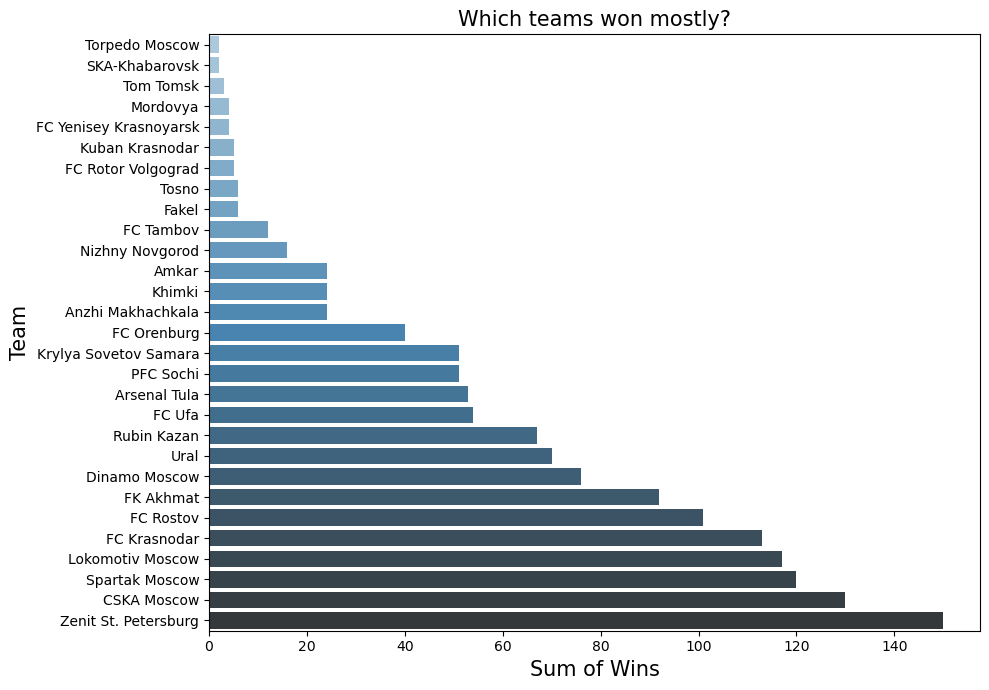

In [51]:
# Let's make some visual to check exatly the number of wins for each team.
rfpl_grouping = rfpl.groupby('team')[['team','wins']].sum().sort_values(by='wins',ascending=True)

rfpl_grouping.reset_index(inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(data=rfpl_grouping, x='wins', y='team', palette="Blues_d")

plt.title("Which teams won mostly?", size=15)
plt.xlabel('Sum of Wins', size=15)
plt.ylabel('Team', size=15)
plt.tight_layout()
plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)
plt.show()

<Figure size 1000x800 with 0 Axes>

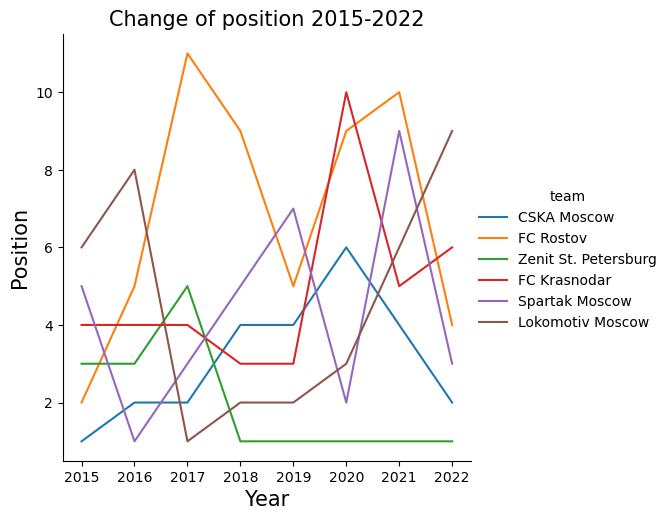

In [52]:
top_6 = ['Zenit St. Petersburg', 'CSKA Moscow', 'Spartak Moscow', 'Lokomotiv Moscow', 'FC Krasnodar', 'FC Rostov' ]
top_6_data = rfpl[rfpl['team'].isin(top_6)]

plt.figure(figsize=(10,8))
sns.relplot(data=top_6_data, x='year', y='position', hue='team', kind='line')


plt.title("Change of position 2015-2022", size=15)
plt.xlabel('Year', size=15)
plt.ylabel("Position", size=15)
plt.show()